In [1]:
!pip install node2vec

  Using cached node2vec-0.3.2-py3-none-any.whl (6.5 kB)
  Using cached gensim-3.8.3-cp37-cp37m-win_amd64.whl (24.2 MB)
Processing c:\users\ferdi\appdata\local\pip\cache\wheels\bb\1c\9c\412ec03f6d5ac7d41f4b965bde3fc0d1bd201da5ba3e2636de\smart_open-2.0.0-py3-none-any.whl
  Using cached boto3-1.13.7-py2.py3-none-any.whl (128 kB)
  Using cached botocore-1.16.7-py2.py3-none-any.whl (6.2 MB)
  Using cached s3transfer-0.3.3-py2.py3-none-any.whl (69 kB)


In [2]:
%matplotlib inline
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec
sns.set_style('whitegrid')
import pandas as pd
import warnings

In [3]:
df = pd.read_csv("datasetfp.csv")
df.head()

,pemain,sutradara,judul_sinetron
0,Dhini Aminarti,Leo Sutanto,Anugerah (sinetron)
1,Nabila Syakieb,Leo Sutanto,Anugerah (sinetron)
2,Sheila Marcia,Leo Sutanto,Anugerah (sinetron)
3,Samuel Zylgwyn,Leo Sutanto,Anugerah (sinetron)
4,Samuel Rizal,Leo Sutanto,Cinta dan Anugerah


In [4]:
g = nx.from_pandas_edgelist(df, source='pemain', target='judul_sinetron')

In [6]:
df2=df[['judul_sinetron', 'sutradara']]
df2.head()

,judul_sinetron,sutradara
0,Anugerah (sinetron),Leo Sutanto
1,Anugerah (sinetron),Leo Sutanto
2,Anugerah (sinetron),Leo Sutanto
3,Anugerah (sinetron),Leo Sutanto
4,Cinta dan Anugerah,Leo Sutanto


In [7]:
mylist = df2.values.tolist()
mylist

[['Anugerah (sinetron)', 'Leo Sutanto'],
 ['Anugerah (sinetron)', 'Leo Sutanto'],
 ['Anugerah (sinetron)', 'Leo Sutanto'],
 ['Anugerah (sinetron)', 'Leo Sutanto'],
 ['Cinta dan Anugerah', 'Leo Sutanto'],
 ['Cinta dan Anugerah', 'Leo Sutanto'],
 ['Cinta dan Anugerah', 'Leo Sutanto'],
 ['Cinta dan Anugerah', 'Leo Sutanto'],
 ['Cinta dan Anugerah', 'Leo Sutanto'],
 ['Cinta dan Anugerah', 'Leo Sutanto'],
 ['Cinta dan Anugerah', 'Leo Sutanto'],
 ['Cinta dan Anugerah', 'Leo Sutanto'],
 ['Cinta dan Anugerah', 'Leo Sutanto'],
 ['Cinta dan Anugerah', 'Leo Sutanto'],
 ['Cinta dan Anugerah', 'Leo Sutanto'],
 ['Cinta dan Anugerah', 'Leo Sutanto'],
 ['Cinta Fitri', 'Manoj Punjabi'],
 ['Cinta Fitri', 'Manoj Punjabi'],
 ['Cinta Fitri', 'Manoj Punjabi'],
 ['Cinta Fitri', 'Manoj Punjabi'],
 ['Cinta Fitri', 'Manoj Punjabi'],
 ['Cinta Fitri', 'Manoj Punjabi'],
 ['Cinta Fitri', 'Manoj Punjabi'],
 ['Cinta Fitri', 'Manoj Punjabi'],
 ['Cinta Fitri', 'Manoj Punjabi'],
 ['Cinta Fitri', 'Manoj Punjabi'],
 ['Cin

In [8]:
g.add_edges_from(mylist,weight=1,label="sutradara")

In [9]:
labels = [i for i in dict(g.nodes).keys()]
labels = {i:i for i in dict(g.nodes).keys()}
labels

{'Dhini Aminarti': 'Dhini Aminarti',
 'Anugerah (sinetron)': 'Anugerah (sinetron)',
 'Nabila Syakieb': 'Nabila Syakieb',
 'Sheila Marcia': 'Sheila Marcia',
 'Samuel Zylgwyn': 'Samuel Zylgwyn',
 'Samuel Rizal': 'Samuel Rizal',
 'Cinta dan Anugerah': 'Cinta dan Anugerah',
 'Alexandra Gottardo': 'Alexandra Gottardo',
 'Putri Titian': 'Putri Titian',
 'Arifin Putra': 'Arifin Putra',
 'Aura Kasih': 'Aura Kasih',
 'Fandy Christian': 'Fandy Christian',
 'Jonas Rivanno': 'Jonas Rivanno',
 'Fero Walandouw': 'Fero Walandouw',
 'Ketrin Agustine': 'Ketrin Agustine',
 'Yasmine Leeds': 'Yasmine Leeds',
 'Giovanni L. Tobing': 'Giovanni L. Tobing',
 'Teuku Wisnu': 'Teuku Wisnu',
 'Cinta Fitri': 'Cinta Fitri',
 'Verlita Evelyn': 'Verlita Evelyn',
 'Meidiana Hutomo': 'Meidiana Hutomo',
 'Nuri Maulida': 'Nuri Maulida',
 'Shireen Sungkar': 'Shireen Sungkar',
 'Adly Fairuz': 'Adly Fairuz',
 'Donita': 'Donita',
 'Irene Librawati': 'Irene Librawati',
 'Lian Firman': 'Lian Firman',
 'Iqbal Pakula': 'Iqbal Pak

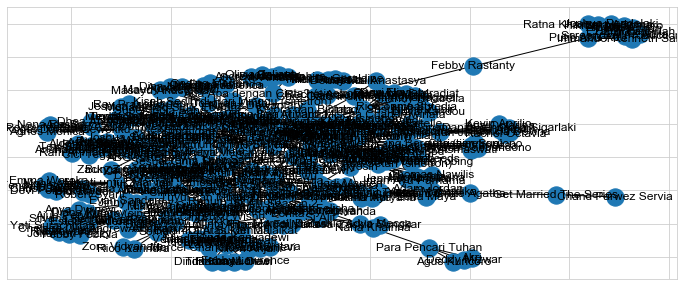

In [10]:
fig, ax = plt.subplots(figsize=(12,5))
layout = nx.spring_layout(g,iterations=50)
nx.draw_networkx_nodes(g, layout, ax = ax, labels=True)
nx.draw_networkx_edges(g, layout, ax = ax)
_ = nx.draw_networkx_labels(g, layout, labels, ax=ax)

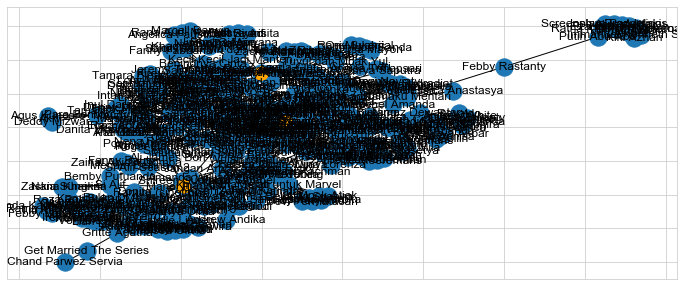

In [12]:
fig, ax = plt.subplots(figsize=(12,5))
layout = nx.spring_layout(g,iterations=50)
nx.draw_networkx_nodes(g, layout, ax = ax, labels=True)
nx.draw_networkx_edges(g, layout, ax=ax)
_ = nx.draw_networkx_labels(g, layout, labels, ax=ax)
sutradarapopuler = [person for person in df.sutradara if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=sutradarapopuler, node_color='orange', node_size=150)

In [15]:
node2vec = Node2Vec(g, dimensions=20, walk_length=16, num_walks=100, workers=2)

Computing transition probabilities: 100%|██████████████████████████████████████████| 347/347 [00:00<00:00, 1855.65it/s]


In [16]:
model = node2vec.fit(window=10, min_count=1)

In [18]:
for node, _ in model.most_similar('Leo Sutanto'):
    print(node)

Kemilau Cinta Kamila
Doa dan Karunia
Naysila Mirdad
Gara-Gara Inul
Kejora dan Bintang
Aqeela dan 3 Bujangan
Di Sini Ada Setan (sinetron)
Pembantu dan Tukang Ojek
Akibat Pernikahan Dini
Mutiara (Sinetron)


C:\Users\Ferdi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [19]:
nodepemain = [x for x in df.pemain]
nodepemain

['Dhini Aminarti',
 'Nabila Syakieb',
 'Sheila Marcia',
 'Samuel Zylgwyn',
 'Samuel Rizal',
 'Alexandra Gottardo',
 'Nabila Syakieb',
 'Putri Titian',
 'Arifin Putra',
 'Aura Kasih',
 'Fandy Christian',
 'Jonas Rivanno',
 'Fero Walandouw',
 'Ketrin Agustine',
 'Yasmine Leeds',
 'Giovanni L. Tobing',
 'Teuku Wisnu',
 'Verlita Evelyn',
 'Meidiana Hutomo',
 'Nuri Maulida',
 'Shireen Sungkar',
 'Adly Fairuz',
 'Donita',
 'Irene Librawati',
 'Lian Firman',
 'Iqbal Pakula',
 'Dinda Kanyadewi',
 'Sandy Syarief',
 'Rachel Amanda',
 'Devi Permatasari',
 'Mpok Atiek',
 'Rezky Aditya',
 'Emma Waroka',
 'Afifa Syahira',
 'Christ Laurent',
 'Chelsea Olivia Wijaya',
 'Fendy Heryanto',
 'Dhini Aminarti',
 'Kinaryosih',
 'Aditya Herpavi Rachman',
 'Asmirandah',
 'Shireen Sungkar',
 'Alice Norin',
 'Rio Reifan',
 'Giovani L.Tobing',
 'Cha Cha Frederica',
 'Agus Kuncoro',
 'Deddy Mizwar',
 'Zaskia Adya Mecca',
 'Akri',
 'Nimaz Dewantary',
 'Stuart Collin',
 'Dhea Annisa',
 'Ade Surya Akbar',
 'Rani Muke

In [20]:
embeddings = np.array([model.wv[x] for x in nodepemain])
embeddings

array([[-0.7967913 , -1.7148488 , -0.80079186, ..., -0.21446961,
        -0.49379352,  3.662693  ],
       [-4.6015143 ,  1.5388131 , -1.5411776 , ..., -2.5267022 ,
        -2.6955621 ,  0.07820899],
       [-3.0318072 ,  0.534107  , -1.5975997 , ..., -0.04360848,
        -1.1076902 ,  1.961701  ],
       ...,
       [-2.7099652 , -0.69841516, -1.4259841 , ..., -2.295646  ,
         2.1825674 , -0.84867716],
       [-2.553183  , -0.62041795,  3.244735  , ...,  0.1583832 ,
         2.9727082 , -1.2927072 ],
       [-3.5575953 , -1.9091399 ,  1.896273  , ..., -2.0697844 ,
         2.9858794 , -0.7373427 ]], dtype=float32)

In [21]:
df.sutradara

0        Leo Sutanto
1        Leo Sutanto
2        Leo Sutanto
3        Leo Sutanto
4        Leo Sutanto
           ...      
392    Manoj Punjabi
393    Manoj Punjabi
394    Manoj Punjabi
395    Manoj Punjabi
396    Manoj Punjabi
Name: sutradara, Length: 397, dtype: object

In [23]:
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

In [27]:
warna_sutradara = {
    'Leo Sutanto': 'lightblue',
    'Manoj Punjabi': 'teal',
    'Deddy Mizwar': 'b',
    'Chand Parwez Servia': 'red',
    'Screenplay Productions': 'orange',
    'Raam Punjabi': 'r'}

df['color'] = df['sutradara'].apply(lambda x: warna_sutradara[x])
warna_pemain=dict(zip(df['pemain'], df['color']))
colors = [warna_pemain[x] for x in df.pemain]

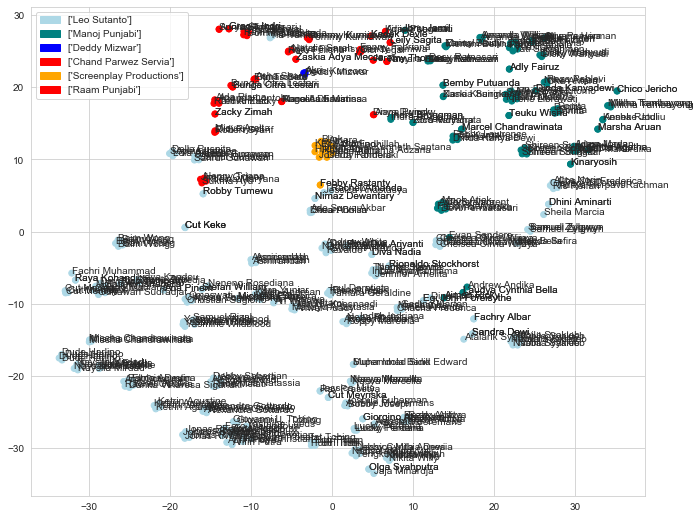

In [28]:
figure = plt.figure(figsize=(11,9))

ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)

i=0
for pemainku in nodepemain:
    ax.annotate(pemainku, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
    i=i+1

sutradara_legend = [mpatches.Patch(color=color, label=df.sutradara.unique()) for df.sutradara, color in warna_sutradara.items()]
ax.legend(handles=sutradara_legend);